In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [13]:
%matplotlib inline

In [15]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/asthma_disease_data.csv')

In [17]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [19]:
# to check for missing values 
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [21]:
# to check for any duplicated values
duplicates = df[df.duplicated()]

In [23]:
# there are no duplicated values
duplicates

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge


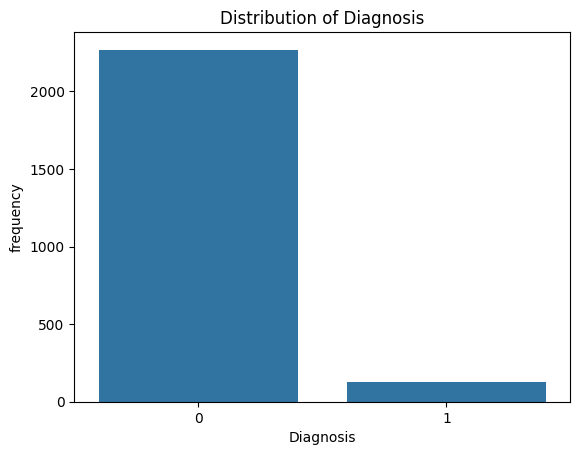

In [221]:
# to visualise the distribution of target variable
sns.countplot(data=df, x='Diagnosis')
plt.title('Distribution of Diagnosis')
plt.ylabel('frequency');
plt.show()

In [27]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [223]:
# 5% of the sample population is diagnosed with Asthma
100 *(df['Diagnosis'].value_counts()/len(df))

Diagnosis
0    94.816054
1     5.183946
Name: count, dtype: float64

In [31]:
df['EducationLevel'].unique()

array([0, 2, 1, 3], dtype=int64)

In [33]:
df['EducationLevel'] = df['EducationLevel'].map({0:'None', 1:'High_School', 2:'Bachelors', 3:'Higher_edu'})

In [35]:
df['EducationLevel'].unique()

array(['None', 'Bachelors', 'High_School', 'Higher_edu'], dtype=object)

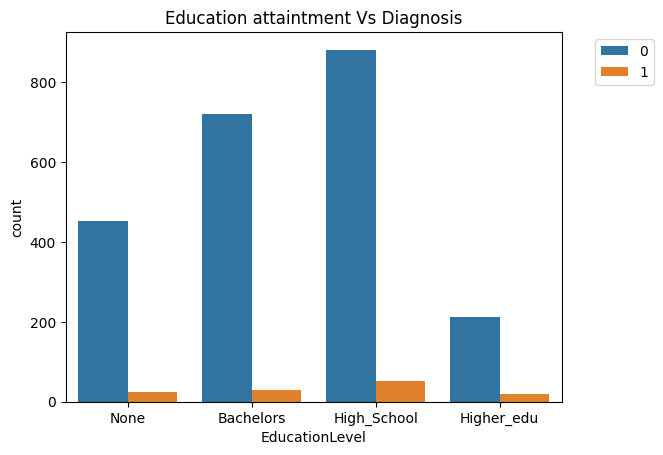

In [37]:
# people in with high school education are more likely to get asthma
sns.countplot(data=df, x= 'EducationLevel', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Education attaintment Vs Diagnosis')
plt.show()

In [39]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [41]:
df['Gender'] = df['Gender'].map({0:'Male', 1:'Female'})

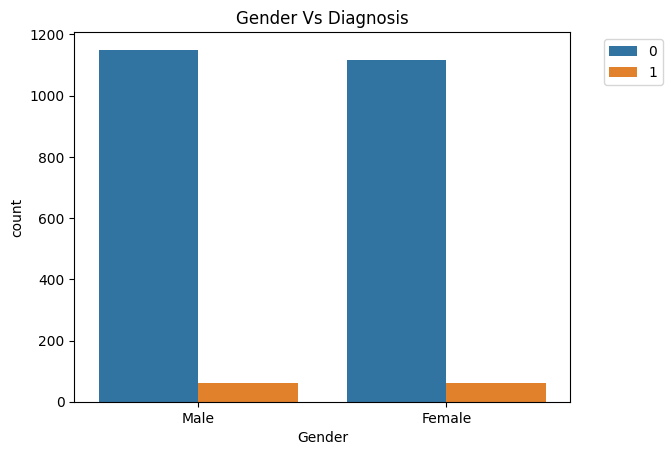

In [43]:
# Both male and females are likely to suffer attacks
sns.countplot(data=df, x='Gender', hue ='Diagnosis')
plt.title('Gender Vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.show()

In [45]:
pd.DataFrame(df.groupby(['Gender','Diagnosis'])['Diagnosis'].count())

Diagnosis
Gender Diagnosis           
Female 0               1118
       1                 62
Male   0               1150
       1                 62

In [47]:
df['Ethnicity'].unique()

array([1, 2, 0, 3], dtype=int64)

In [49]:
df['Ethnicity'] = df['Ethnicity'].map({0:'Caucasian', 1:'African American', 2:'Asian', 3:'Other'})

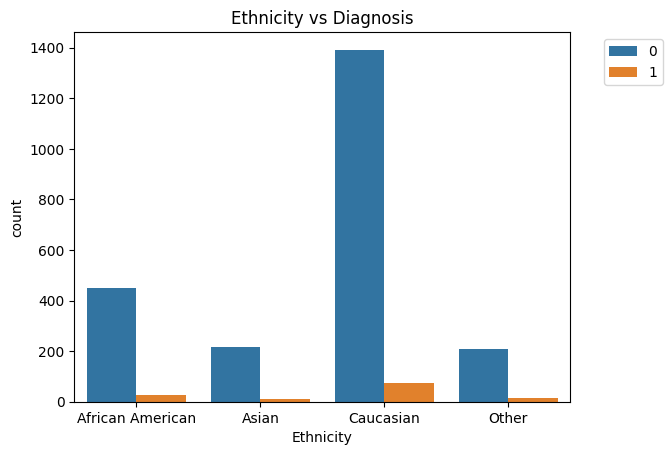

In [51]:
# Caucasians are more likely to suffer from Asthma attacks
sns.countplot(data=df, x='Ethnicity', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Ethnicity vs Diagnosis')
plt.show()

In [53]:
# to remove unimportant variables not useful for analysis
df = df.drop(['PatientID','DoctorInCharge'], axis=1)

In [55]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,Male,African American,None,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,Female,Asian,Bachelors,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,Male,Asian,High_School,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,Female,Asian,High_School,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,Male,Caucasian,Higher_edu,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


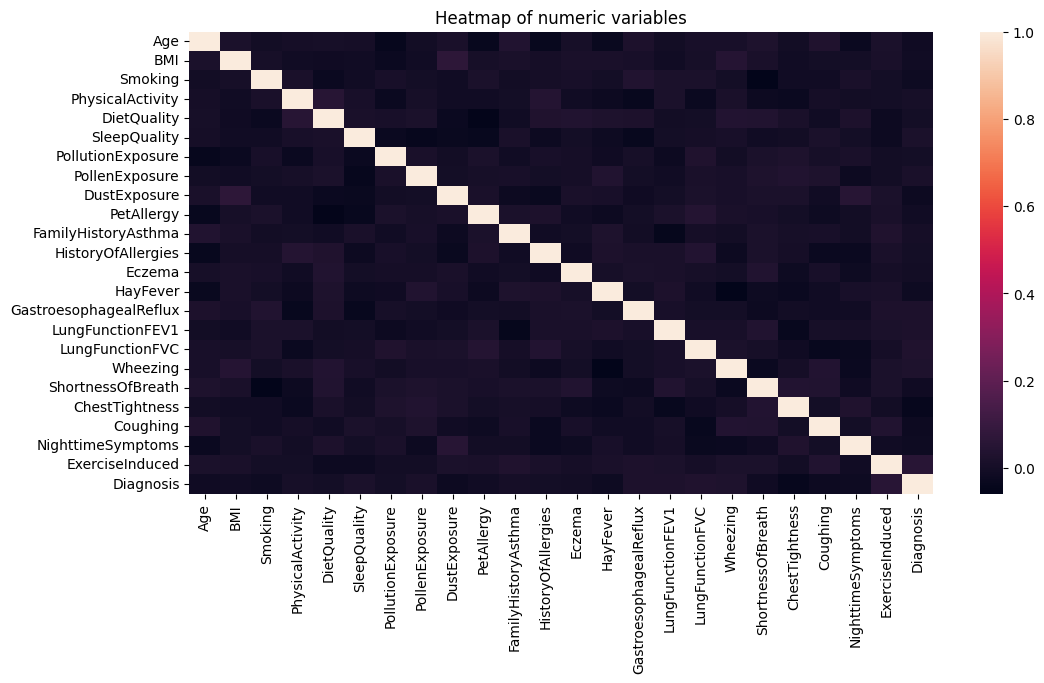

In [57]:
# to visualise correlation of all numeric values in a heatmap
plt.figure(figsize=(12,6), dpi=100)
sns.heatmap(data= df.select_dtypes(['int','float']).corr())
plt.title('Heatmap of numeric variables')
plt.show()

In [59]:
# to define X and y
X = df.drop('Diagnosis', axis=1)

In [61]:
# to convert categorical variable into dummy variable, drop_first = True to remove multi-collinearity
X = pd.get_dummies(X, drop_first = True)

In [63]:
y = df['Diagnosis']

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
# to make the dataset into equivalent scale
from sklearn.preprocessing import StandardScaler

In [69]:
# to assign 20% as testing set, 80% training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [71]:
# to scale the dataset
scaler = StandardScaler()

In [73]:
scaled_X_train = scaler.fit_transform(X_train)

In [75]:
# to transform on the X testing data
scaled_X_test = scaler.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [7]:
from xgboost import XGBClassifier

In [89]:
from sklearn.model_selection import GridSearchCV

In [1]:
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, recall_score, classification_report

In [79]:
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, recall_score, classification_report

In [81]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [91]:
dt = DecisionTreeClassifier()

In [93]:
# to define the decision tree parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [95]:
# Set up GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [97]:
# Fit GridSearchCV
grid_search_dt.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [101]:
# Best parameters and score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best score found: ", grid_search_dt.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score found:  0.9351783248807294


In [105]:
# AUC score for Decision Treet test prediction model = 0.495
best_model = grid_search_dt.best_estimator_
dt_test_pred = best_model.predict(scaled_X_test)
print("DT test AUC score: ", roc_auc_score(y_test, dt_test_pred))

DT test AUC score:  0.49557522123893805


In [107]:
best_model = grid_search_dt.best_estimator_
dt_train_pred = best_model.predict(scaled_X_train)
print("DT train AUC score: ", roc_auc_score(y_train, dt_train_pred))

DT train AUC score:  0.5751169444570597


In [111]:
print(classification_report(y_test,dt_test_pred)) # decision tree classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.48       479
weighted avg       0.89      0.94      0.91       479



In [113]:
rf = RandomForestClassifier()

In [117]:
# Define parameter grid (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [119]:
# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [121]:
# Fit GridSearchCV
grid_search_rf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [123]:
# Best parameters and score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score found: ", grid_search_rf.best_score_)

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score found:  0.9492953125640782


In [125]:
# AUC score for Random Forest test prediction model = 0.5
best_model = grid_search_rf.best_estimator_
rf_test_pred = best_model.predict(scaled_X_test)
print("RF test AUC score: ", roc_auc_score(y_test, rf_test_pred ))

RF test AUC score:  0.5


In [127]:
best_model = grid_search_rf.best_estimator_
rf_train_pred = best_model.predict(scaled_X_train)
print("RF test AUC score: ", roc_auc_score(y_train, rf_train_pred))

RF test AUC score:  0.9948453608247423


In [129]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [131]:
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier()

In [133]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm based on [2]_.
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      

In [135]:
# Define the parameter grid, Ada Boost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME.R','SAMME']
}

In [137]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [139]:
# Fit the model on the training data
grid_search_ada.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [147]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_ada.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_ada.best_score_)

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9492953125640782


In [149]:
# AUC score for AdaBoost test model = 0.5
best_model = grid_search_ada.best_estimator_
ada_test_pred = best_model.predict(scaled_X_test)
print("AdaBoost test AUC score: ", roc_auc_score(y_test, ada_test_pred))

AdaBoost test AUC score:  0.5


In [153]:
best_model = grid_search_ada.best_estimator_
ada_train_pred = best_model.predict(scaled_X_train)
print("AdaBoost train AUC score: ", roc_auc_score(y_train, ada_train_pred))

AdaBoost train AUC score:  0.5


In [155]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

In [157]:
# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier()

In [159]:
# Define the parameter grid, Gradient Boost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [161]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [163]:
# Fit the model on the training data
grid_search_gbc.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [165]:
# Print the Gradient Boost best parameters and best score
print("Best Parameters:", grid_search_gbc.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_gbc.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9492953125640782


In [167]:
# AUC score for Gradient Boost classifier test set = 0.5
best_model = grid_search_gbc.best_estimator_
gbc_test_pred = best_model.predict(scaled_X_test)
print("Gradient Boost classifier:", roc_auc_score(y_test, gbc_test_pred))

Gradient Boost classifier: 0.5


In [169]:
best_model = grid_search_gbc.best_estimator_
gbc_train_pred = best_model.predict(scaled_X_train)
print("Gradient Boost classifier:", roc_auc_score(y_train, gbc_train_pred))

Gradient Boost classifier: 0.5


In [171]:
print(classification_report(y_test, gbc_test_pred)) # Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [173]:
# Initialize the XGBoost classifier
xgb = XGBClassifier()

In [175]:
# Define the parameter grid, XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [177]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [179]:
# Fit the model on the training data
grid_search_xgb.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [181]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_xgb.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.9}
Best Cross-Validation Accuracy: 0.9498188727735022


In [183]:
# AUC score for XGBoost classifier test score = 0.5
best_model = grid_search_xgb.best_estimator_
xgb_test_pred = best_model.predict(scaled_X_test)
print("XGBoost classifier AUC test score: ", roc_auc_score(y_test, xgb_test_pred))

XGBoost classifier AUC test score:  0.5


In [185]:
best_model = grid_search_xgb.best_estimator_
xgb_train_pred = best_model.predict(scaled_X_train)
print("XGBoost classifier AUC train score: ", roc_auc_score(y_train, xgb_train_pred))

XGBoost classifier AUC train score:  0.7216494845360825


In [187]:
print(classification_report(y_test, xgb_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [217]:
pd.DataFrame(data = xgb.feature_importances_, index=X.columns, columns = ['Importance']).sort_values('Importance', ascending=False)

,Importance
Smoking,0.060083
ShortnessOfBreath,0.054996
Ethnicity_Other,0.052326
PetAllergy,0.048434
ChestTightness,0.043834
ExerciseInduced,0.042783
GastroesophagealReflux,0.041407
Coughing,0.039017
NighttimeSymptoms,0.038971
Age,0.036770


In [243]:
# to read into a new dataframe
xgb_imp = pd.DataFrame(data = xgb.feature_importances_, index=X.columns, columns = ['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_4716\1108686304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_imp, y=xgb_imp.index, x='Importance', palette='coolwarm')


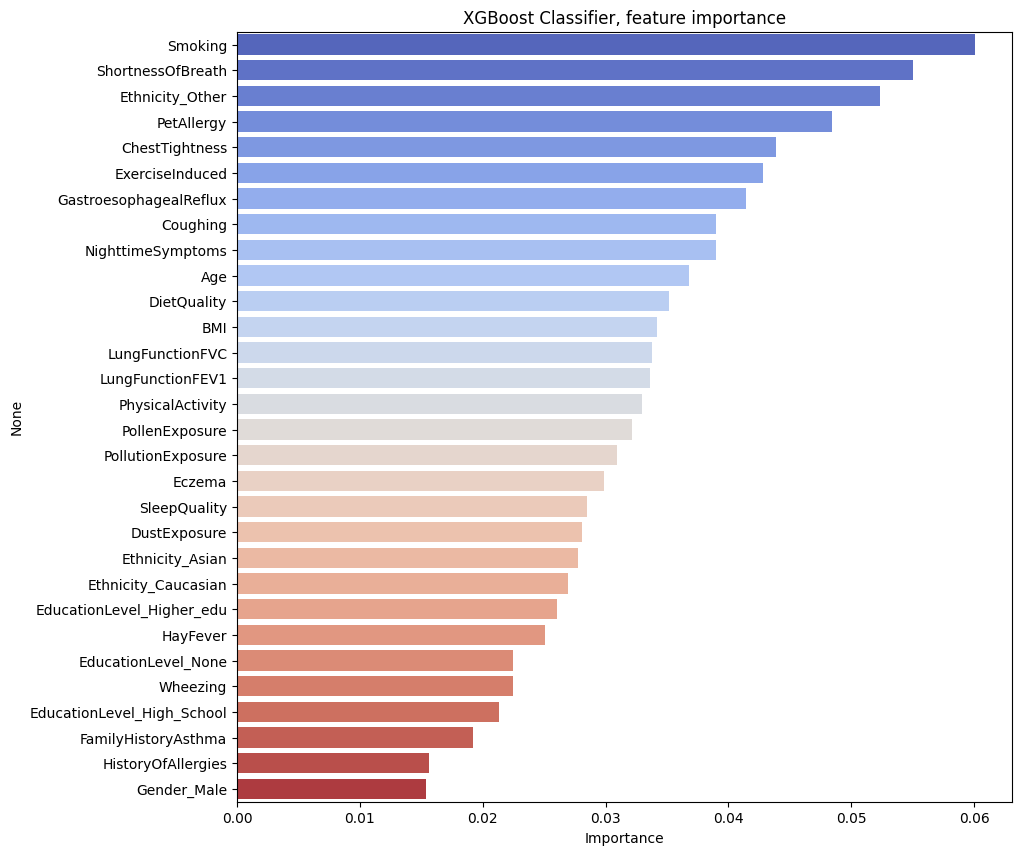

In [261]:
# Predictors for asthma triggers are 1) Smoking, 2)Shortness of Breath, 4) Pet Allerfy, 5) Chest Tightness
# to visualise feature importance in a barplot
plt.figure(figsize=(10,10) ,dpi=100)
sns.barplot(data=xgb_imp, y=xgb_imp.index, x='Importance', palette='coolwarm')
plt.title('XGBoost Classifier, feature importance')
plt.show()